<a href="https://colab.research.google.com/github/seonhs/incheon_airport/blob/main/%EC%8B%AC%ED%99%94%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%AA%A8%EB%8D%B8%EC%84%A0%EB%B3%84%EA%B3%BC%EC%A0%95%20%EB%B0%8F%20%EC%B5%9C%EC%84%9D%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.11.11


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/full_2_data.csv'
full2_data =  pd.read_csv(file_path)
full2_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake
0,Octavia,2017,10550,Manual,25250,Petrol,150.0,54.3,1.4,skoda
1,Citigo,2018,8200,Manual,1264,Petrol,145.0,67.3,1.0,skoda
2,Octavia,2019,15650,Automatic,6825,Diesel,145.0,67.3,2.0,skoda
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165.0,51.4,2.0,skoda
4,Superb,2019,18350,Manual,10912,Petrol,150.0,40.9,1.5,skoda
...,...,...,...,...,...,...,...,...,...,...
99181,Fiesta,2016,7999,Manual,31348,Petrol,125.0,54.3,1.2,ford
99182,B-MAX,2017,8999,Manual,16700,Petrol,150.0,47.1,1.4,ford
99183,B-MAX,2014,7499,Manual,40700,Petrol,30.0,57.7,1.0,ford
99184,Focus,2015,9999,Manual,7010,Diesel,20.0,67.3,1.6,ford


In [17]:
df = full2_data.copy()
str_list = ['model', 'transmission', 'fuelType', 'carMake'] # 명목변수
# # 이산형 'year'
# # 연속형 'price','mileage','tax','tax(£)', 'engineSize'

In [ ]:
# 가격별 산점도(선형성 확인)
import seaborn as sns
import matplotlib.pyplot as plt
# 이산형 'year'
# 연속형 'price','mileage','tax','tax(£)', 'engineSize'
num_colums = df._get_numeric_data().columns.tolist()
# sns.lmplot(data= df, x='year', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()
# sns.lmplot(data= df, x='mileage', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()

for i in num_colums:
  if i != 'price':
    sns.lmplot(data= df, x=i, y='price',
        line_kws={'color':'green'}
    )
    plt.ylim(0)
    plt.show()

NameError: name 'df' is not defined

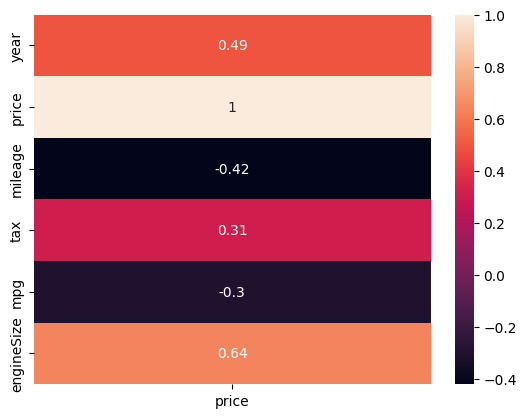

In [ ]:
correlation_matrix = df[num_colums].corr()
sns.heatmap(correlation_matrix[['price']], annot=True)
plt.show()

In [ ]:
# 가격별 산점도(선형성 확인)-> 변화후 확인
import seaborn as sns
import matplotlib.pyplot as plt
num_colums = df._get_numeric_data().columns.tolist()

#
# sns.lmplot(data= df, x='year', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()
# sns.lmplot(data= df, x='mileage', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()

for i in num_colums:
  if i != 'price':
    sns.lmplot(data= df, x=i, y='price',
        line_kws={'color':'green'}
    )
    plt.ylim(0)
    plt.show()

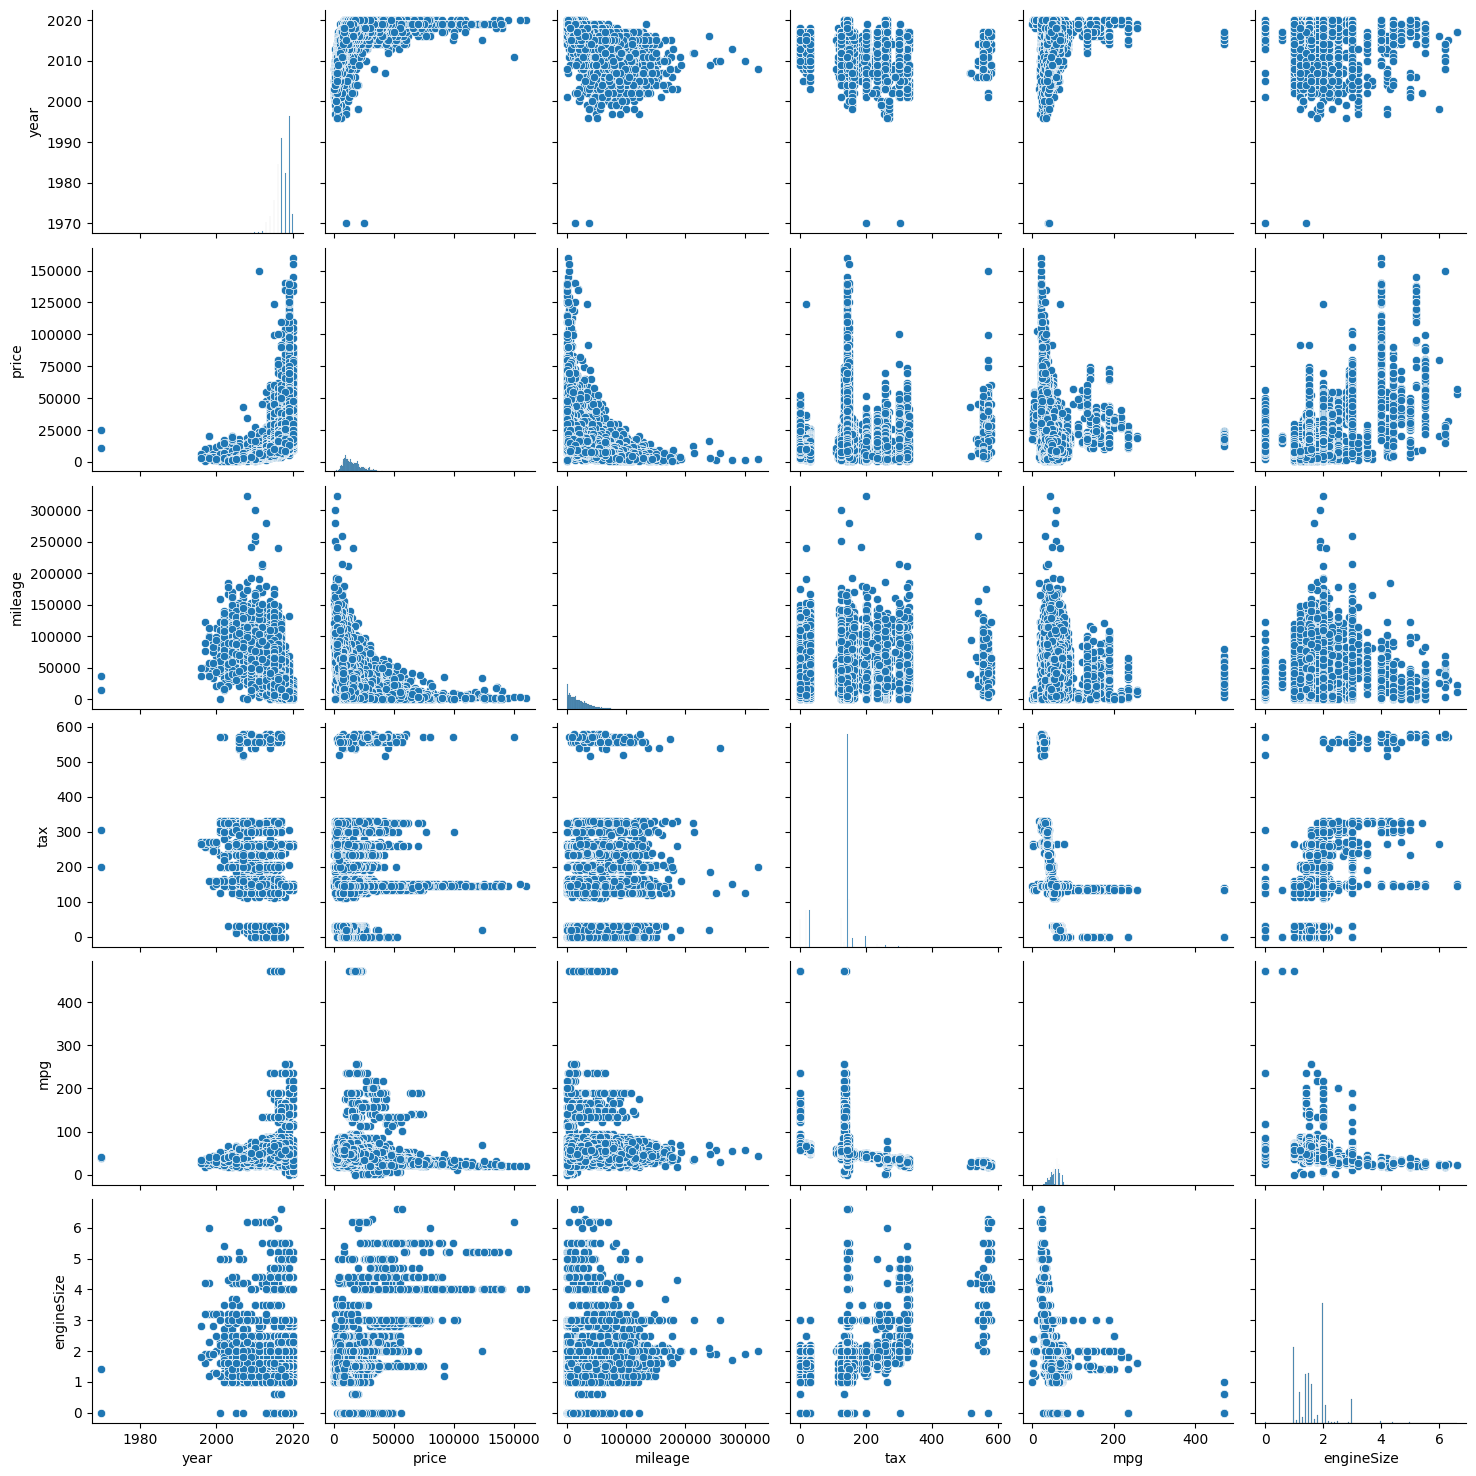

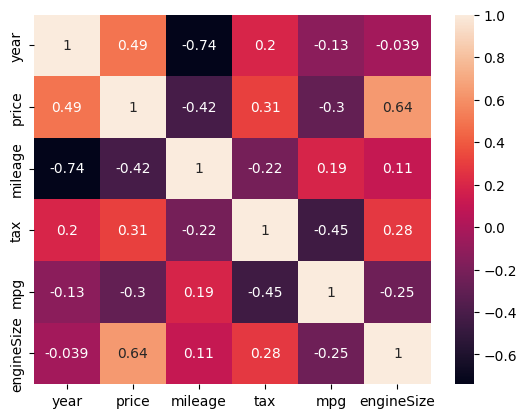

In [11]:
# 독립변수가 여러개라서 변수간의 상관성 확인 필요-- VIF
import seaborn as sns
import matplotlib.pyplot as plt
num_colums = df._get_numeric_data().columns.tolist()
correlation_matrix = df[num_colums].corr()
sns.pairplot(df[num_colums])
plt.show()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

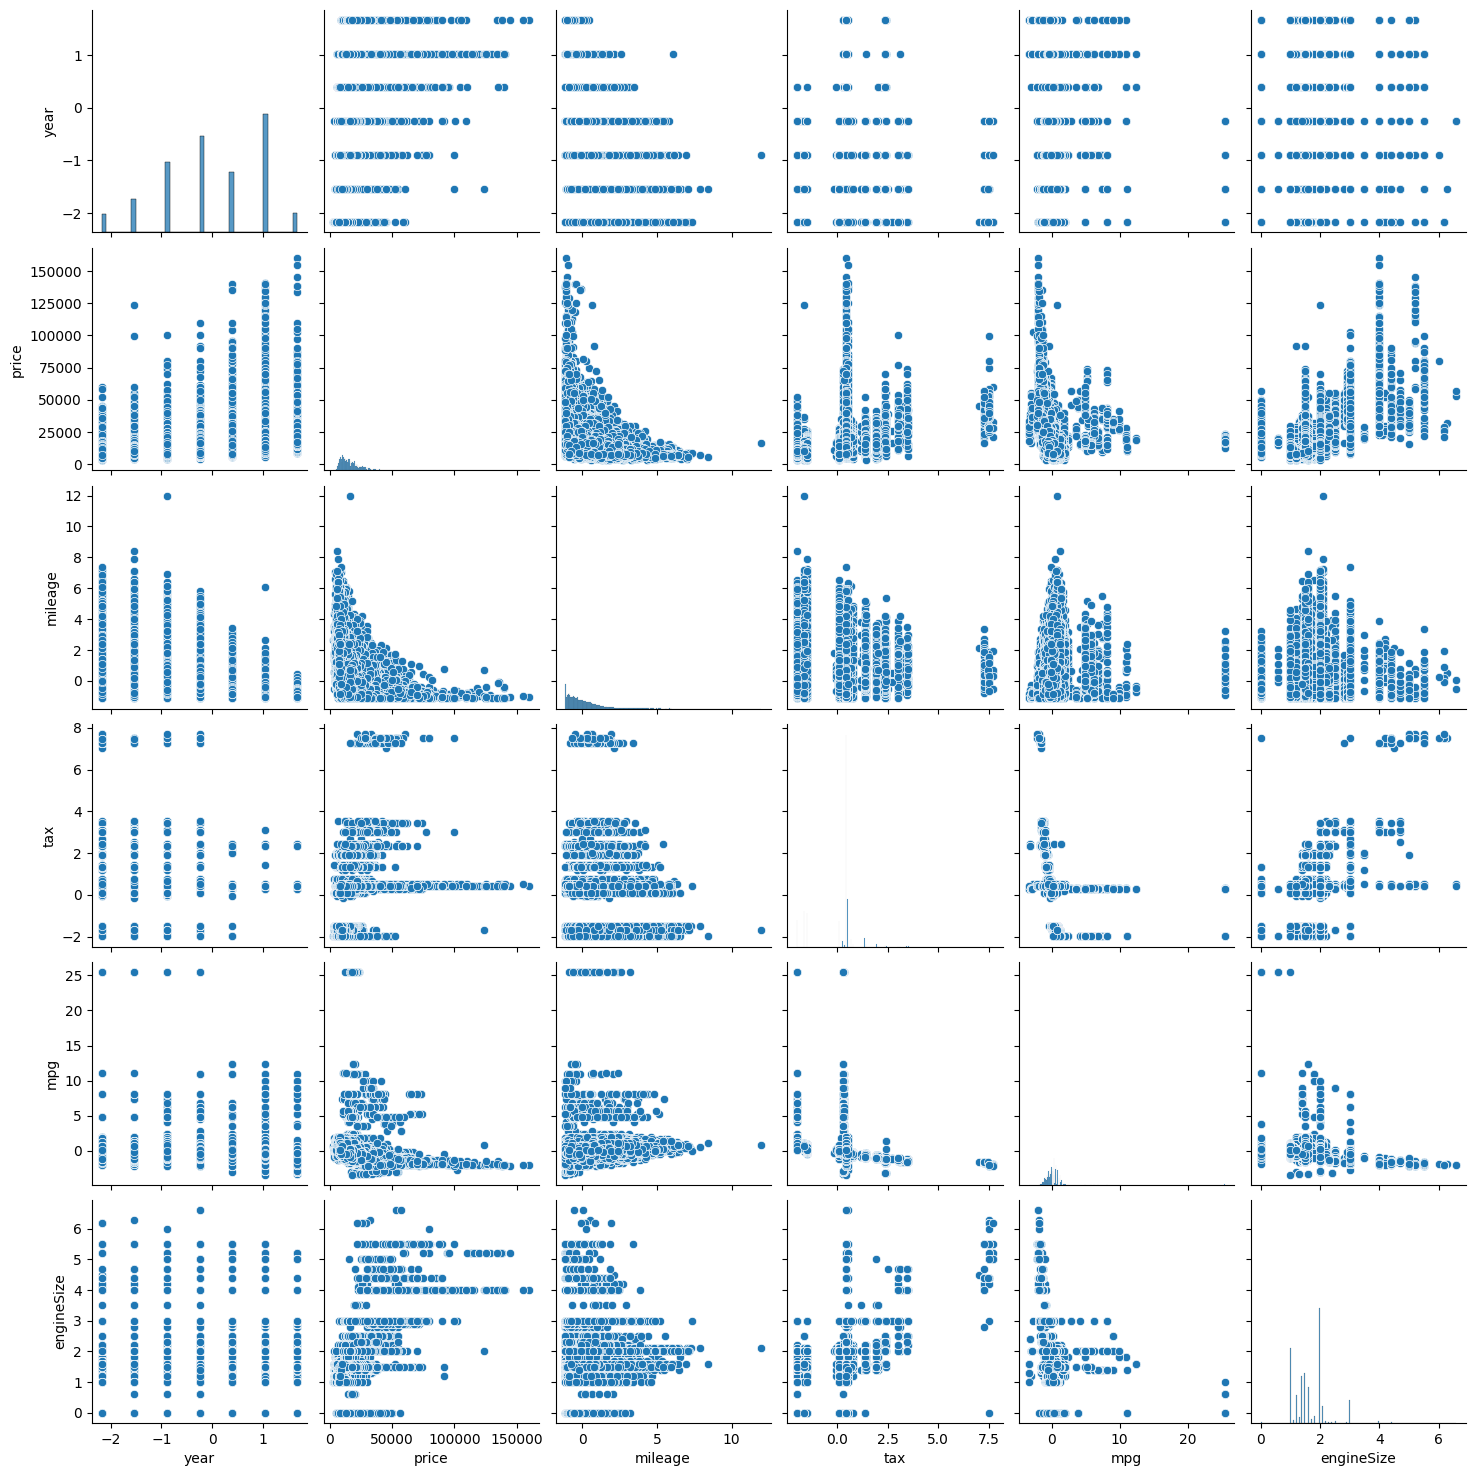

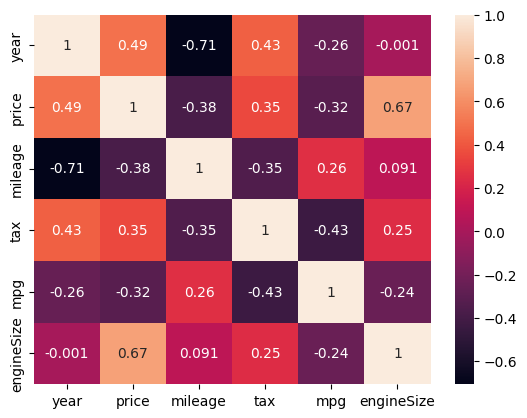

In [ ]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler

normalize_columns = ["year", "mileage", "tax", "mpg"]
scaler = StandardScaler()
df[normalize_columns] = scaler.fit_transform(df[normalize_columns])

df[normalize_columns].head()

import seaborn as sns
import matplotlib.pyplot as plt
num_colums = df._get_numeric_data().columns.tolist()
correlation_matrix = df[num_colums].corr()
sns.pairplot(df[num_colums])
plt.show()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [92]:
#인코딩
from sklearn.preprocessing import LabelEncoder
import numpy as np
lable_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']

def Encoding(df, lable_list, onhot_list):
  """ 범주형데이터를 숫자형으로 변경하는 함수
  df: 변경할 데이터 프레임
  lable_list: 라벨 인코딩
  onhot_list: 원핫 인코딩
  """
  # 라벨 인코딩
  encoding_df=df.copy()
  le  = LabelEncoder()
  encoding_df[lable_list] = encoding_df[lable_list].apply(le.fit_transform)
  # 원 핫 인코딩
  encoding_df = pd.get_dummies(encoding_df, columns=onhot_list, drop_first= True, dtype=float)
  # drop_first: 첫번째 더미 삭제, dtype: 불리언에서 정수형으로변경
  print(len(encoding_df.columns))
  return encoding_df

encoding_df = Encoding(df,lable_list,onhot_list)
encoding_df

22


,model,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,...,fuelType_Other,fuelType_Petrol,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,10550,25250,150.0,54.3,1.4,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,53,2018,8200,1264,145.0,67.3,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,116,2019,15650,6825,145.0,67.3,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,188,2015,14000,28431,165.0,51.4,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,154,2019,18350,10912,150.0,40.9,1.5,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,7999,31348,125.0,54.3,1.2,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99182,34,2017,8999,16700,150.0,47.1,1.4,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99183,34,2014,7499,40700,30.0,57.7,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99184,65,2015,9999,7010,20.0,67.3,1.6,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
#데이터 분할
from sklearn.model_selection import train_test_split
def Data_split(df, price):
  """ 데이터를 분할하는 함수
  df: 분할할 데이터 프레임
  price: 종속 변수명
  출력
  X_train: 학습데이터
  X_test: 테스트 데이터
  y_train: 학습데이터(실제값)
  y_test: 테스트데이터(실제값)
  """
  X = df.drop(columns=price)
  y = df[price]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
  print(X_train.shape, X_test.shape)
  print(y_train.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

#예제
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

(69430, 21) (29756, 21)
(69430,) (29756,)


In [79]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
# 로그 변환
def Log_Trans(y_train, y_test):
  # y값 로그변환
  log_y_train = np.log1p(y_train)
  log_y_test = np.log1p(y_test)
  return log_y_train, log_y_test

# sd 스케일링
def Sd_Scaling(X_train, X_test, normalize_columns):
  #독립 변수 표준화(standscaler방법)
  sd_X_train = X_train.copy()
  sd_X_test = X_test.copy()
  standscaler = StandardScaler()
  #train데이터 스케일링
  sd_X_test = X_test.copy()
  sd_X_train[normalize_columns] = standscaler.fit_transform(X_train[normalize_columns])
  #test데이터 스케일링
  sd_X_test[normalize_columns] = standscaler.transform(X_test[normalize_columns])
  return sd_X_train, sd_X_test

#  표준 정규화
def Robust_Scaling(X_train, X_test, normalize_columns):
  #독립 변수 표준 정규화(RobustScaler방법)
  robust_X_train = X_train.copy()
  robust_X_test = X_test.copy()
  robustScaler = RobustScaler()
  #train데이터 스케일링
  robust_X_train[normalize_columns] = robustScaler.fit_transform(X_train[normalize_columns])
  #test데이터 스케일링
  robust_X_test[normalize_columns] = robustScaler.transform(X_test[normalize_columns])
  return robust_X_train, robust_X_test

# 데이터 분할하고 사용
normalize_columns = ["year", "mileage", "tax", "mpg"] # 표준 정규화할 변수 리스트
log_y_train, log_y_test = Log_Trans(y_train, y_test)
sd_X_train, sd_X_test = Sd_Scaling(X_train, X_test, normalize_columns)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

def Linear_model(X_train, X_test, y_train, y_test):
  """ 선형모델 학습 및 평가 함수
  X_train: 학습데이터
  X_test: 테스트 데이터
  y_train: 학습데이터(실제값)
  y_test: 테스트데이터(실제값)
  출력
  rg: 선형모델
  y_train_pred: 학습데이터 예측값
  y_test_pred: 테스트데이터 예측값
  """
  # 선형모델 학습
  rg = LinearRegression()
  rg.fit(X_train, y_train)

  # 예측  모델 평가
  y_train_pred = rg.predict(X_train)
  y_test_pred = rg.predict(X_test)
  # 학습 정확도
  train_accuarcy = rg.score(X_train, y_train)
  print("학습 정확도:", rg.score(X_train, y_train))
  # 이유는 valid용어를 사용하는 것이 바람직하나 분할을 test로 지정하여 용어에 혼란이 온다.
  return y_train_pred, y_test_pred, train_accuarcy

def lgbm_model(x1, x2, y1, y2):
  ### LGBMRegressor 모델 학습과 R2 결과
  X_train = x1 # X_train: 학습데이터
  X_test = x2 # X_test: 테스트 데이터
  y_train = y1 # y_train: 학습데이터(실제값)
  y_test = y2 # y_test: 테스트데이터(실제값)
  """
  출력
  rg: 선형모델
  y_train_pred: 학습데이터 예측값
  y_test_pred: 테스트데이터 예측값
  """
  # LGBMRegressor 모델 선언 후 Fitting
  lgb_model = LGBMRegressor(random_state=42) # all hyper-parameter : default
  lgb_model.fit(X_train, y_train)

  # Fitting된 모델로 x_valid를 통해 예측을 진행
  y_train_pred = lgb_model.predict(X_train)
  y_test_pred = lgb_model.predict(X_test)

  # 학습 정확도
  train_accuarcy = lgb_model.score(X_train, y_train)
  print("학습 정확도:",lgb_model.score(X_train, y_train))
  return y_train_pred, y_test_pred, train_accuarcy

def xgb_model(x1, x2, y1, y2):
  # LGBMRegressor 모델 학습과 R2 결과
  X_train = x1 # X_train: 학습데이터
  X_test = x2 # X_test: 테스트 데이터
  y_train = y1 # y_train: 학습데이터(실제값)
  y_test = y2 # y_test: 테스트데이터(실제값)
  """
  출력
  rg: 선형모델
  y_train_pred: 학습데이터 예측값
  y_test_pred: 테스트데이터 예측값
  """
  # XGBRegressor 모델 선언 후 Fitting
  xgb_model = XGBRegressor(random_state=42)  # all hyper-parameter : default
  xgb_model.fit(X_train, y_train)

  # Fitting된 모델로 예측 수행
  y_train_pred = xgb_model.predict(X_train)
  y_test_pred = xgb_model.predict(X_test)

  # 학습 정확도
  train_accuarcy = xgb_model.score(X_train, y_train)
  print("학습 정확도:", xgb_model.score(X_train, y_train))
  return y_train_pred, y_test_pred, train_accuarcy

def Rfr_model(x1, x2, y1, y2):
  # 랜덤 포레스트 회귀 모델 학습
  X_train = x1 # X_train: 학습데이터
  X_test = x2 # X_test: 테스트 데이터
  y_train = y1 # y_train: 학습데이터(실제값)
  y_test = y2 # y_test: 테스트데이터(실제값)
  """
  출력
  rfr: 선형모델
  y_train_pred: 학습데이터 예측값
  y_test_pred: 테스트데이터 예측값
  """
  # 랜덤 포레스트 회귀 모델 학습
  rfr = RandomForestRegressor(random_state=42)
  rfr.fit(X_train, y_train)
  # Fitting된 모델로 예측 수행
  y_train_pred = rfr.predict(X_train)
  y_test_pred = rfr.predict(X_test)
  # 랜덤 포레스트 R2-score
  # 학습 정확도
  train_accuarcy = rfr.score(X_train, y_train)
  print("학습 정확도:",rfr.score(X_train, y_train))
  return y_train_pred, y_test_pred, train_accuarcy

# 예제
# y_train_pred, y_test_pred, train_accuarcy = Linear_model(X_train, X_test, y_train, y_test)
# y_train_pred, sd_y_test_pred, train_accuarcy = Linear_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
# y_train_pred, robust_y_test_pred, train_accuarcy = Linear_model(robust_X_train, robust_X_test, log_y_train, log_y_test)

#예제
y_train_pred, y_test_pred, train_accuarcy = Rfr_model(X_train, X_test, y_train, y_test)
y_train_pred, sd_log_y_test_pred, train_accuarcy = Rfr_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
y_train_pred, robust_log_y_test_pred, train_accuarcy = Rfr_model(robust_X_train, robust_X_test, log_y_train, log_y_test)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


학습 정확도: 0.9939892313925853
학습 정확도: 0.9945527820336816
학습 정확도: 0.9945530079563516


In [102]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# 역변한 필요한 경우
def Exp_y(log_y_test, log_y_test_pred):
  trans_y_test = np.expm1(log_y_test) # 실제값
  trans_y_test_pred = np.expm1(log_y_test_pred) #예상값
  return trans_y_test, trans_y_test_pred

def model_evaluation(y_test, y_test_pred, result_name ) :
  """ 모델 평가 함수
  trans_y_test: 데스트 데이터 역변환 실제값
  trans_y_test_pred: 데스트데이터 역변환 예측값
  result_name: 결과를 저장할 컬럼 이름
  """
  mse = round(mean_squared_error(y_test, y_test_pred),3) # 실제 y값, 예측값
  mae = round(mean_absolute_error(y_test, y_test_pred),3)
  rmse = round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3) # 실제 y값, 예측값
  r2 = round(r2_score(y_test, y_test_pred),3)
  mape = round((mean_absolute_percentage_error(y_test, y_test_pred)*100),3)

  print(f"\nLGBM {result_name} Results\n")
  print(f"평균 절대 오차(MAE): {mae}")
  print(f"평균 제곱 오차(MSE): {rmse}")
  print(f"평균 절대비율 오차(MAPE): {mape}")
  print(f"결정 계수(R2): {r2}")

  result_list = ['mse', 'rmse', 'mae', 'mape', 'r2']
  result_name = str(result_name)
  result_df = pd.DataFrame(data=[mse, rmse, mae, mape, r2],
                           index=result_list, columns=[result_name])
  return result_df

# 예제
Rfr_base = model_evaluation(y_test, y_test_pred, result_name="Rfr_base")
trans_y_test, trans_y_test_pred =  Exp_y(log_y_test, sd_log_y_test_pred)
Rfr_Log_sd = model_evaluation(trans_y_test, trans_y_test_pred, result_name="Rfr_Log+sd")
trans_y_test, trans_y_test_pred =  Exp_y(log_y_test, robust_log_y_test_pred)
Rfr_Log_robust = model_evaluation(trans_y_test, trans_y_test_pred, result_name="Rfr_Log+robust")

result_df = pd.concat([Rfr_base, Rfr_Log_sd, Rfr_Log_robust], axis=1)
result_df


LGBM Rfr_base Results

평균 절대 오차(MAE): 1153.511
평균 제곱 오차(MSE): 1993.567
평균 절대비율 오차(MAPE): 7.278
결정 계수(R2): 0.959

LGBM Rfr_Log+sd Results

평균 절대 오차(MAE): 1152.366
평균 제곱 오차(MSE): 1988.674
평균 절대비율 오차(MAPE): 7.161
결정 계수(R2): 0.959

LGBM Rfr_Log+robust Results

평균 절대 오차(MAE): 1152.25
평균 제곱 오차(MSE): 1987.505
평균 절대비율 오차(MAPE): 7.161
결정 계수(R2): 0.959


In [100]:
# 연도 정규화 제외
lable_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

normalize_columns = ["mileage", "tax", "mpg"] # 표준 정규화할 변수 리스트
log_y_train, log_y_test = Log_Trans(y_train, y_test)
sd_X_train, sd_X_test = Sd_Scaling(X_train, X_test, normalize_columns)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)

y_train_pred, y_test_pred, train_accuarcy = Rfr_model(X_train, X_test, y_train, y_test)
Rfr_base = model_evaluation(y_test, y_test_pred, result_name="Rfr_base")

y_train_pred, sd_log_y_test_pred, train_accuarcy = Rfr_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
trans_y_test, trans_y_test_pred =  Exp_y(log_y_test, sd_log_y_test_pred)
Rfr_Log_sd = model_evaluation(trans_y_test, trans_y_test_pred, result_name="Rfr_Log+sd")

y_train_pred, robust_log_y_test_pred, train_accuarcy = Rfr_model(robust_X_train, robust_X_test, log_y_train, log_y_test)
trans_y_test, trans_y_test_pred =  Exp_y(log_y_test, robust_log_y_test_pred)
Rfr_Log_robust = model_evaluation(trans_y_test, trans_y_test_pred, result_name="Rfr_Log+robust")

result_df = pd.concat([Rfr_base, Rfr_Log_sd, Rfr_Log_robust], axis=1)
result_df

22
(69267, 21) (29686, 21)
(69267,) (29686,)
학습 정확도: 0.9940012472203068

LGBM Rfr_base Results

평균 절대 오차(MAE): 1151.411
평균 제곱 오차(MSE): 1986.761
평균 절대비율 오차(MAPE): 7.264
결정 계수(R2): 0.959
학습 정확도: 0.994526541266912

LGBM Rfr_Log+sd Results

평균 절대 오차(MAE): 1152.12
평균 제곱 오차(MSE): 1988.277
평균 절대비율 오차(MAPE): 7.161
결정 계수(R2): 0.959
학습 정확도: 0.9945707399275737

LGBM Rfr_Log+robust Results

평균 절대 오차(MAE): 1152.651
평균 제곱 오차(MSE): 1987.395
평균 절대비율 오차(MAPE): 7.173
결정 계수(R2): 0.959


In [95]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [97]:
# 엔진 사이즈 중 0이며 엔진인경우 제외
df = df[~((df['engineSize'] == 0) & (df['fuelType'].isin(["Petrol", "Diesel"])))]
able_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

normalize_columns = ["mileage", "tax", "mpg"] # 표준 정규화할 변수 리스트
log_y_train, log_y_test = Log_Trans(y_train, y_test)
sd_X_train, sd_X_test = Sd_Scaling(X_train, X_test, normalize_columns)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)

y_train_pred, y_test_pred, train_accuarcy = Rfr_model(X_train, X_test, y_train, y_test)
Rfr_base = model_evaluation(y_test, y_test_pred, result_name="Rfr_base")

y_train_pred, sd_log_y_test_pred, train_accuarcy = Rfr_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
trans_y_test, trans_y_test_pred =  Exp_y(log_y_test, sd_log_y_test_pred)
Rfr_Log_sd = model_evaluation(trans_y_test, trans_y_test_pred, result_name="Rfr_Log+sd")

y_train_pred, robust_log_y_test_pred, train_accuarcy = Rfr_model(robust_X_train, robust_X_test, log_y_train, log_y_test)
trans_y_test, trans_y_test_pred =  Exp_y(log_y_test, robust_log_y_test_pred)
Rfr_Log_robust = model_evaluation(trans_y_test, trans_y_test_pred, result_name="Rfr_Log+robust")

result_df = pd.concat([Rfr_base, Rfr_Log_sd, Rfr_Log_robust], axis=1)
result_df

22
(69267, 21) (29687, 21)
(69267,) (29687,)
학습 정확도: 0.9935475540068268
학습 정확도: 0.9944525929289346
학습 정확도: 0.9944322631839622

LGBM Rfr_base Results

평균 절대 오차(MAE): 1150.96
평균 제곱 오차(MSE): 1890.915
평균 절대비율 오차(MAPE): 7.307
결정 계수(R2): 0.963

LGBM Rfr_Log+sd Results

평균 절대 오차(MAE): 1145.876
평균 제곱 오차(MSE): 1875.903
평균 절대비율 오차(MAPE): 7.181
결정 계수(R2): 0.964

LGBM Rfr_Log+robust Results

평균 절대 오차(MAE): 1145.664
평균 제곱 오차(MSE): 1877.786
평균 절대비율 오차(MAPE): 7.175
결정 계수(R2): 0.964


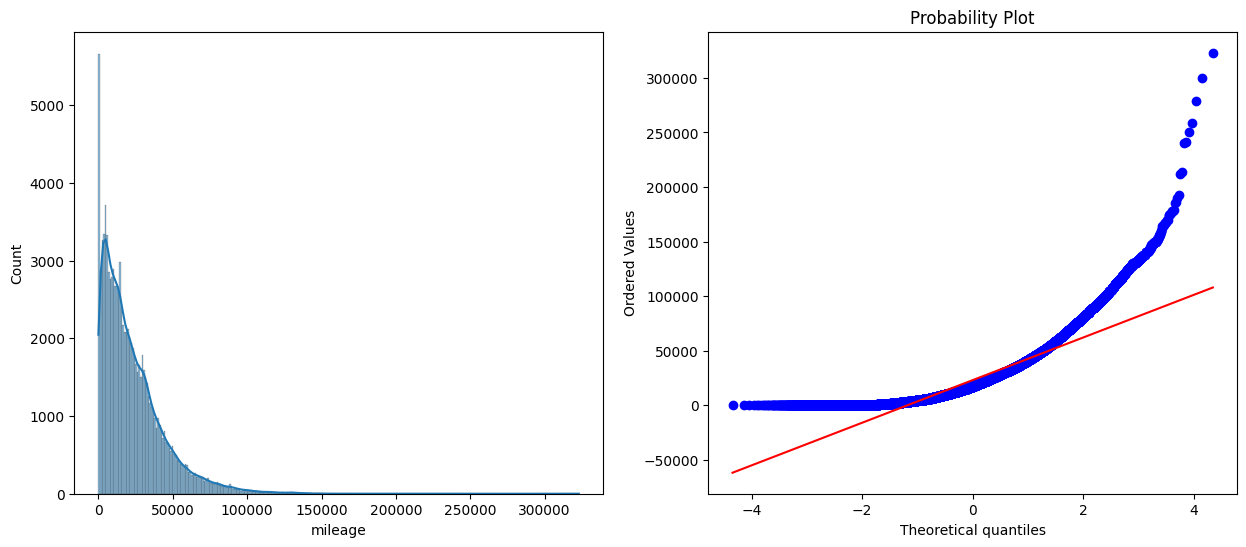

<Axes: xlabel='mileage', ylabel='Count'>

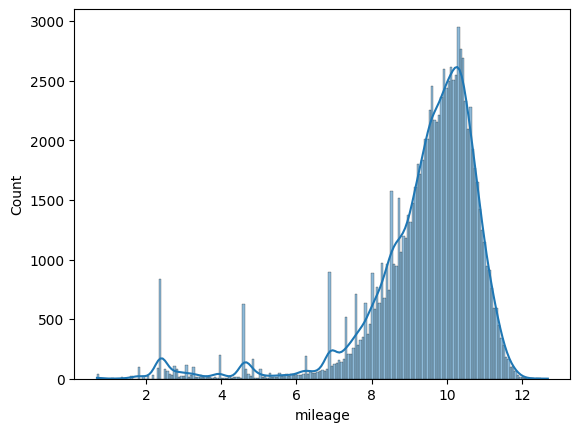

In [ ]:
from scipy import stats

fig, axs = plt.subplots(1,2, figsize = (15,6))

sns.histplot(encoding_df["mileage"], ax =axs[0], kde=True)
stats.probplot(encoding_df["mileage"], dist='norm', fit=True, plot=axs[1]) # QQplot

plt.show()

sns.histplot(np.log1p(encoding_df["mileage"]), kde=True)

In [ ]:
# 분위수 회귀
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

able_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

# quantiles = [0.25, 0.75]
qr = QuantileRegressor(quantile=0.25, alpha=0) # alpha 제약조건(L1,L2)
qr.fit(X_train, y_train)
y_train_pred = qr.predict(X_train)
y_test_pred = qr.predict(X_test)

# 예측  모델 평가
qr_Q1_base = model_evaluation(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred, result_name="qr_Q1_base")
qr_Q1_base['qr_Q1_base'] = qr_Q1_base['qr_Q1_base'].round(3)
pd.options.display.float_format = '{:.3f}'.format
qr_Q1_base

qr = QuantileRegressor(quantile=0.75, alpha=0) # alpha 제약조건(L1,L2)
qr.fit(X_train, y_train)
y_train_pred = qr.predict(X_train)
y_test_pred = qr.predict(X_test)

# 예측  모델 평가
qr_Q3_base = model_evaluation(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred, result_name="qr_Q3_base")
qr_Q3_base['qr_Q3_base'] = qr_Q1_base['qr_Q3_base'].round(3)
pd.options.display.float_format = '{:.3f}'.format
qr_Q3_base

qr_base_result = pd.concat([qr_Q1_base, qr_Q3_base], axis=1)
qr_base_result